In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
        path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import time
from datetime import timedelta
from pprint import pprint
import corner
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tqdm import tqdm

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.nddata.utils import Cutout2D
from astropy.wcs import WCS

from lenstronomy.Workflow.fitting_sequence import FittingSequence
from lenstronomy.Plots import chain_plot
from lenstronomy.Plots.model_plot import ModelPlot
import lenstronomy.Util.util as util

from utils import csv_utils

In [3]:
input_csv_filepath = os.path.join(repo_path, 'data', 'SLACS', 'SLACS.csv')
dataset_dict_list = csv_utils.csv_to_dict_list(input_csv_filepath)

  0%|          | 0/111 [00:00<?, ?it/s]/tmp/ipykernel_18923/1655249620.py:28: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(data))
  1%|          | 1/111 [00:00<01:16,  1.44it/s]/tmp/ipykernel_18923/1655249620.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection=wcs)
  3%|▎         | 3/111 [00:01<00:34,  3.17it/s]/tmp/ipykernel_18923/1655249620.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection=wcs)
/tmp/ipykernel_18923/1655249620.py:28: RuntimeWarning: invalid value encountered in log10
  ax.imshow(np.log10(data))
  4%|▎         | 4/111 [00:01<00:35,  3.03it/s]/tmp/ipykernel_18923/1655249620.py:27: MatplotlibDeprecationWarning: Auto-removal of overlap

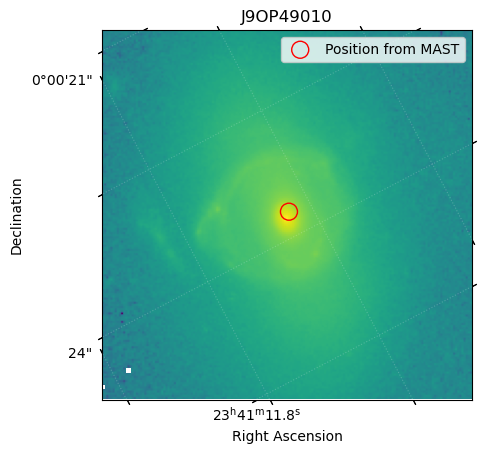

In [4]:
for dataset in tqdm(dataset_dict_list):
    if dataset.get('cutout_filepath') == '':
        continue

    if dataset.get('spec') != 'CLEAR1L;F814W':
        continue

    with fits.open(dataset.get('cutout_filepath')) as hdu_list:
        data = hdu_list['PRIMARY'].data
        header = hdu_list['PRIMARY'].header

    wcs = WCS(header=hdu_list['PRIMARY'].header)
    ra, dec = float(dataset.get('ra')), float(dataset.get('dec'))

    num_pix = 175

    sky_coords = SkyCoord(ra, dec, unit='deg', frame='icrs')
    size = u.Quantity((num_pix, num_pix), u.pixel)
    cutout_obj = Cutout2D(data, sky_coords, size, wcs=wcs)

    # overwrite data and wcs
    data = cutout_obj.data
    wcs = cutout_obj.wcs

    center_pixel_y, center_pixel_x = wcs.all_world2pix(ra, dec, 1, adaptive=False, ra_dec_order=True)

    ax = plt.subplot(projection=wcs)
    ax.imshow(np.log10(data))
    plt.grid(color='white', ls=':', alpha=0.2)
    plt.scatter(center_pixel_x, center_pixel_y, edgecolor='red', facecolor='none', s=150, label='Position from MAST')
    plt.xlabel('Right Ascension')
    plt.ylabel('Declination')
    plt.title(dataset.get('data_set_name'))
    plt.legend()
    plt.savefig(os.path.join(repo_path, 'figures', 'SLACS', 'mosaic_pieces', dataset.get('data_set_name') + '.png'))